<a href="https://colab.research.google.com/github/thesuravaram/Data-Analytics/blob/main/HeartDiseaseUCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Suravaram Dhanush**
<br>**Roll No: 251580840034**</br>

**Heart Disease Prediction and Analysis**
<br>Dataset: Heart Disease UCI Dataset</br>
<br>Case Study: Theory DA-Health 2</br>
<br>Questions:</br>
1. Display a histogram of patient counts by age group.
2. Filter the dataset for a specific gender or age range
(e.g., males aged 40–50).
3. Which age group has the highest percentage of heart
disease cases?
4. Identify the top 3 major risk factors (e.g., cholesterol,
blood pressure, max heart rate).
5. Plot a scatter plot showing cholesterol vs max heart
rate for diseased vs non-diseased patients.
6. Compare average cholesterol levels between patients
with and without heart disease.
7. Find the month or time period

In [62]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('heart_disease_uci.csv') # Adjust path if needed
df.columns = [col.lower().strip() for col in df.columns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [65]:
# Convert boolean strings to actual boolean type if needed
df['fbs'] = df['fbs'].map({'True': 1, 'False': 0})
df['exang'] = df['exang'].map({'True': 1, 'False': 0})
df['sex'] = df['sex'].str.capitalize()

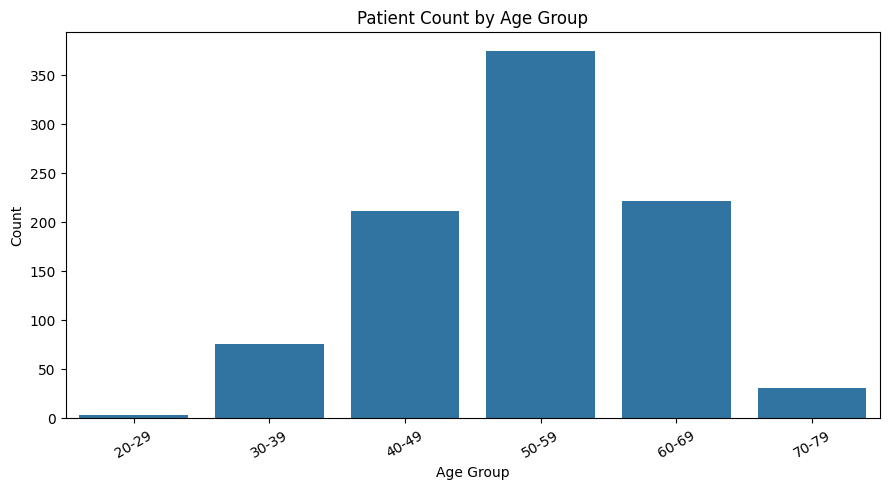

In [66]:
# 1. Histogram of patient counts by age group
bins = list(range(df['age'].min()//10*10, (df['age'].max()//10+1)*10+1, 10))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(9,5))
sns.countplot(x='age_group', data=df, order=labels)
plt.title('Patient Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [67]:
# 2. Filter: males aged 40–50
filtered = df[(df['sex'] == 'Male') & (df['age'] >= 40) & (df['age'] <= 50)]
print("Males aged 40-50:")
print(filtered.head())

Males aged 40-50:
    id  age   sex    dataset               cp  trestbps   chol  fbs  \
13  14   44  Male  Cleveland  atypical angina     120.0  263.0  NaN   
16  17   48  Male  Cleveland  atypical angina     110.0  229.0  NaN   
19  20   49  Male  Cleveland  atypical angina     130.0  266.0  NaN   
28  29   43  Male  Cleveland     asymptomatic     150.0  247.0  NaN   
29  30   40  Male  Cleveland     asymptomatic     110.0  167.0  NaN   

           restecg  thalch  exang  oldpeak        slope   ca  \
13          normal   173.0    NaN      0.0    upsloping  0.0   
16          normal   168.0    NaN      1.0  downsloping  0.0   
19          normal   171.0    NaN      0.6    upsloping  0.0   
28          normal   171.0    NaN      1.5    upsloping  0.0   
29  lv hypertrophy   114.0    NaN      2.0         flat  0.0   

                 thal  num age_group  
13  reversable defect    0     40-49  
16  reversable defect    1     40-49  
19             normal    0     40-49  
28            

In [68]:
# 3. Age group with highest heart disease percentage
# 'num' column: >0 means disease, 0 means no disease
df['heart_disease'] = (df['num'] > 0).astype(int)
age_group_hd_pct = df.groupby('age_group', observed=True)['heart_disease'].mean() * 100
print("\nHeart Disease % by Age Group:")
print(age_group_hd_pct)
print("Highest risk group:", age_group_hd_pct.idxmax(), f"({age_group_hd_pct.max():.2f}%)")


Heart Disease % by Age Group:
age_group
20-29     0.000000
30-39    34.210526
40-49    40.094340
50-59    56.800000
60-69    73.423423
70-79    70.967742
Name: heart_disease, dtype: float64
Highest risk group: 60-69 (73.42%)


In [69]:
# 4. Top 3 major risk factors (by absolute correlation with heart_disease)
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
corr_matrix = df[num_cols + ['heart_disease']].corr()['heart_disease'].abs().sort_values(ascending=False)
print("\nTop 3 numeric features correlated with heart disease:")
print(corr_matrix[1:4].index.tolist())


Top 3 numeric features correlated with heart disease:
['ca', 'thalch', 'oldpeak']


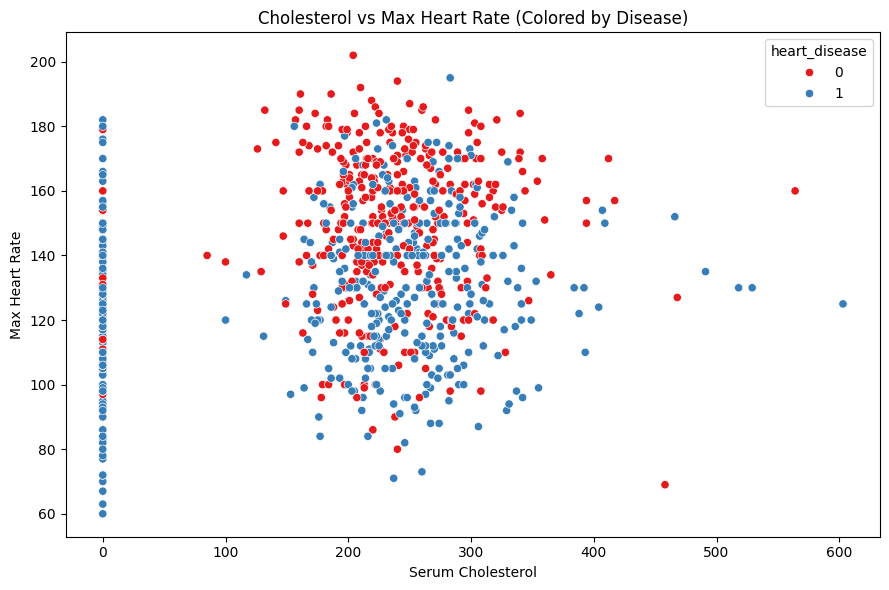

In [70]:
# 5. Scatter plot: cholesterol vs max heart rate, colored by heart disease status
plt.figure(figsize=(9,6))
sns.scatterplot(x='chol', y='thalch', hue='heart_disease', data=df, palette='Set1')
plt.title('Cholesterol vs Max Heart Rate (Colored by Disease)')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Max Heart Rate')
plt.tight_layout()
plt.show()

In [71]:
# 6. Compare average cholesterol: with and without heart disease
avg_chol = df.groupby('heart_disease')['chol'].mean()
print(f"\nAvg cholesterol (No Disease): {avg_chol.get(0, np.nan):.2f}")
print(f"Avg cholesterol (Disease): {avg_chol.get(1, np.nan):.2f}")


Avg cholesterol (No Disease): 227.91
Avg cholesterol (Disease): 176.48


In [72]:
# 7. Diagnoses by month or time period
if 'month' in df.columns:
  print("Most diagnoses in month:", df['month'].value_counts().idxmax())
else:
  print("Month/time period data not available in this dataset.")

Month/time period data not available in this dataset.
